# Import Tools


In [527]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import joblib
import json

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [528]:
path = "data\weathersense_gather.csv"
original_data = pd.read_csv(path)
data = original_data.copy()

display(original_data.head())
display(data.head())

<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
C:\Users\mazon\AppData\Local\Temp\ipykernel_19644\2239475918.py:1: SyntaxWarning: invalid escape sequence '\w'
  path = "data\weathersense_gather.csv"


,id,ts,temp_sensor,humidity_sensor,temp_api,humidity_api,pressure,wind_speed,cloudiness,weather
0,1,2024-04-18 17:04:21,20,50,36.88,57,1004,5.66,20,Clouds
1,2,2024-04-18 17:14:22,20,47,36.38,58,1004,5.66,20,Clouds
2,3,2024-04-18 17:24:22,20,50,35.80,58,1003,5.66,20,Clouds
3,4,2024-04-18 17:34:22,20,49,35.80,58,1003,5.66,20,Clouds
4,5,2024-04-18 17:44:23,20,49,35.49,59,1003,5.66,20,Clouds


,id,ts,temp_sensor,humidity_sensor,temp_api,humidity_api,pressure,wind_speed,cloudiness,weather
0,1,2024-04-18 17:04:21,20,50,36.88,57,1004,5.66,20,Clouds
1,2,2024-04-18 17:14:22,20,47,36.38,58,1004,5.66,20,Clouds
2,3,2024-04-18 17:24:22,20,50,35.80,58,1003,5.66,20,Clouds
3,4,2024-04-18 17:34:22,20,49,35.80,58,1003,5.66,20,Clouds
4,5,2024-04-18 17:44:23,20,49,35.49,59,1003,5.66,20,Clouds


# Data Exploration

In [529]:
data.dtypes

id                   int64
ts                  object
temp_sensor          int64
humidity_sensor      int64
temp_api           float64
humidity_api         int64
pressure             int64
wind_speed         float64
cloudiness           int64
weather             object
dtype: object

In [530]:
data['ts'] = pd.to_datetime(data['ts'])
display(data.head())


,id,ts,temp_sensor,humidity_sensor,temp_api,humidity_api,pressure,wind_speed,cloudiness,weather
0,1,2024-04-18 17:04:21,20,50,36.88,57,1004,5.66,20,Clouds
1,2,2024-04-18 17:14:22,20,47,36.38,58,1004,5.66,20,Clouds
2,3,2024-04-18 17:24:22,20,50,35.80,58,1003,5.66,20,Clouds
3,4,2024-04-18 17:34:22,20,49,35.80,58,1003,5.66,20,Clouds
4,5,2024-04-18 17:44:23,20,49,35.49,59,1003,5.66,20,Clouds


In [531]:
data.shape

(158, 10)

In [532]:
data.describe()

,id,ts,temp_sensor,humidity_sensor,temp_api,humidity_api,pressure,wind_speed,cloudiness
count,158.000000,158,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.0
mean,79.500000,2024-04-19 15:18:55.670885888,23.145570,55.873418,34.642278,59.398734,1005.392405,4.864494,20.0
min,1.000000,2024-04-18 17:04:21,18.000000,36.000000,29.040000,25.000000,1002.000000,2.570000,20.0
25%,40.250000,2024-04-19 01:49:13,19.000000,50.000000,31.740000,44.000000,1004.000000,3.600000,20.0
50%,79.500000,2024-04-19 16:07:19.500000,23.000000,55.000000,35.185000,59.000000,1006.000000,5.140000,20.0
75%,118.750000,2024-04-20 00:27:41.249999872,27.000000,61.000000,37.477500,74.000000,1007.000000,5.660000,20.0
max,158.000000,2024-04-20 13:29:07,31.000000,89.000000,39.860000,89.000000,1008.000000,7.720000,20.0
std,45.754781,NaN,3.873519,9.099404,3.133118,17.390949,1.787556,1.296931,0.0


In [533]:
categorical_features = data.select_dtypes(include="object").columns.tolist()
numerical_features = data.select_dtypes(exclude="object").columns.tolist()

display(categorical_features)
display(numerical_features)

['weather']

['id',
 'ts',
 'temp_sensor',
 'humidity_sensor',
 'temp_api',
 'humidity_api',
 'pressure',
 'wind_speed',
 'cloudiness']

In [534]:
numerical_features.remove("id")
numerical_features.remove("ts")

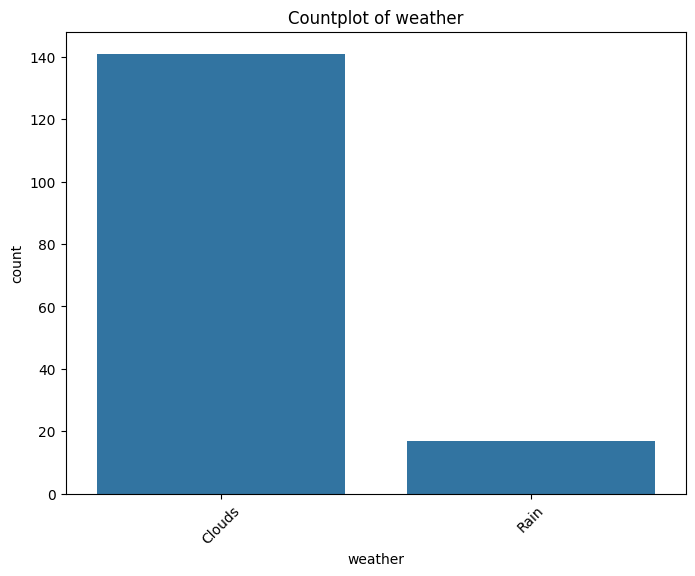

In [535]:
# Visualizing categorical features using countplot
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x=feature)
    plt.title(f'Countplot of {feature}')
    plt.xticks(rotation=45)
    plt.show()

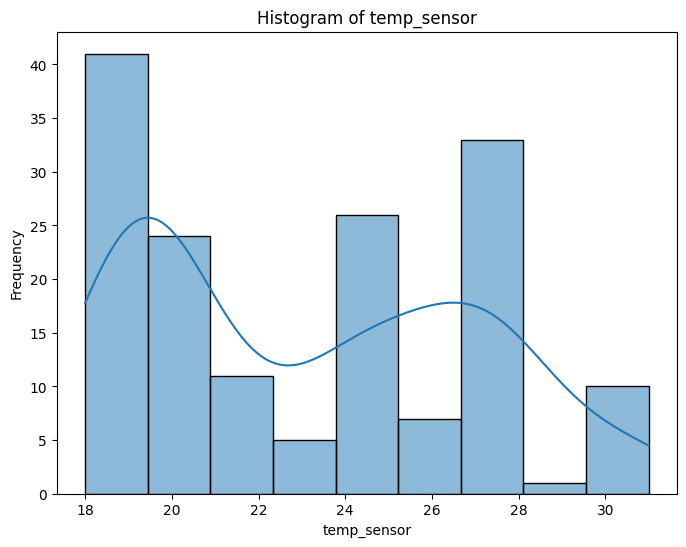

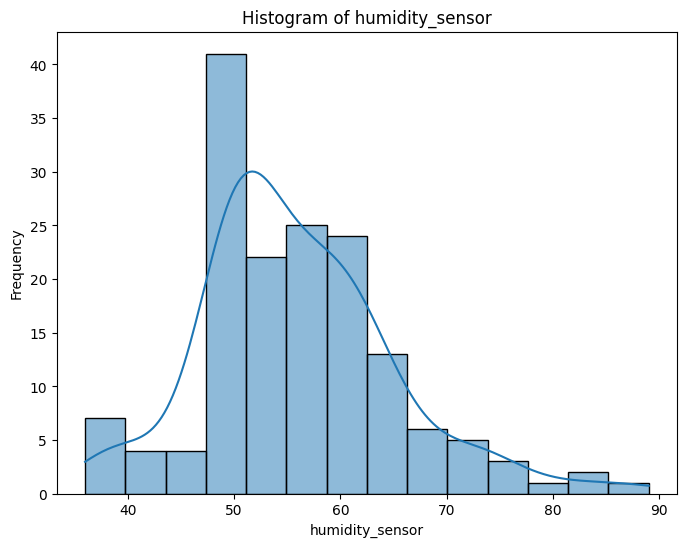

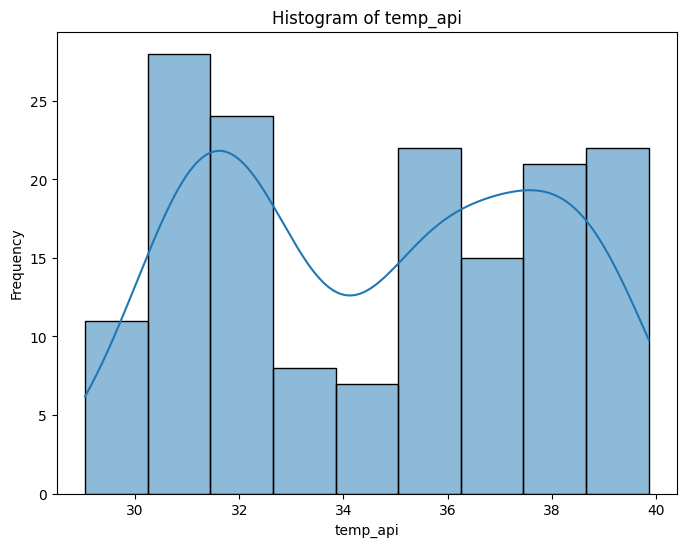

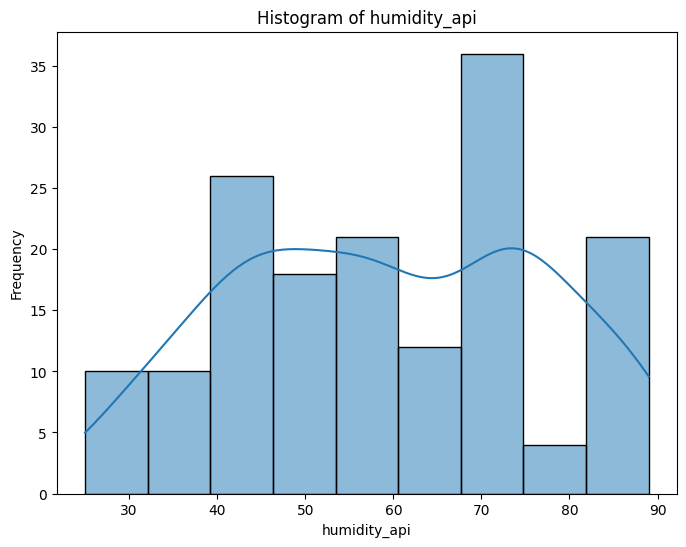

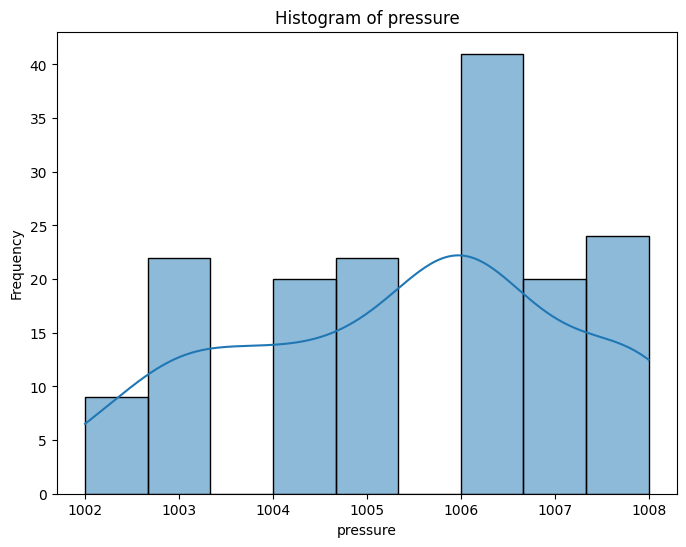

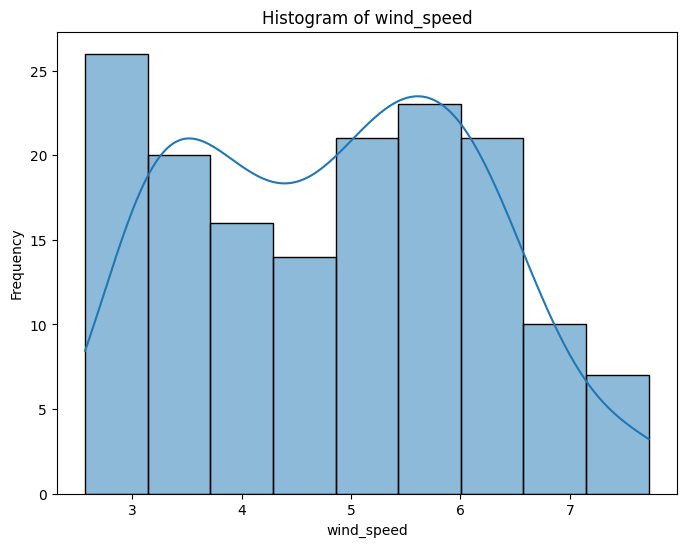

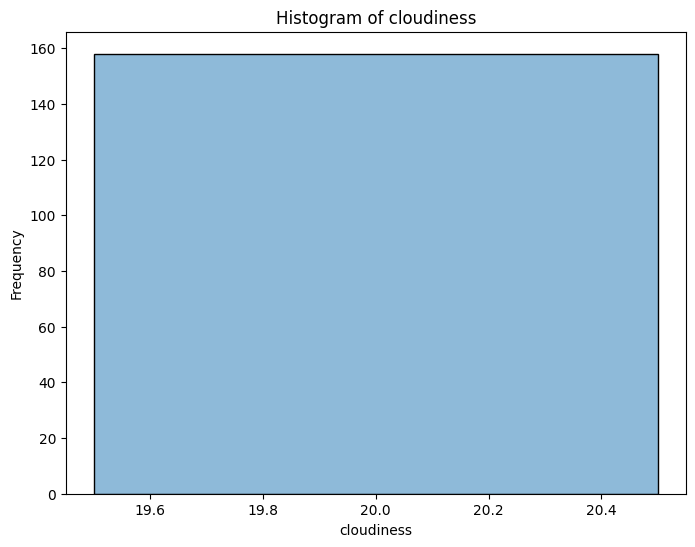

In [536]:
# Visualizing numerical features using histogram plot
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data, x=feature, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

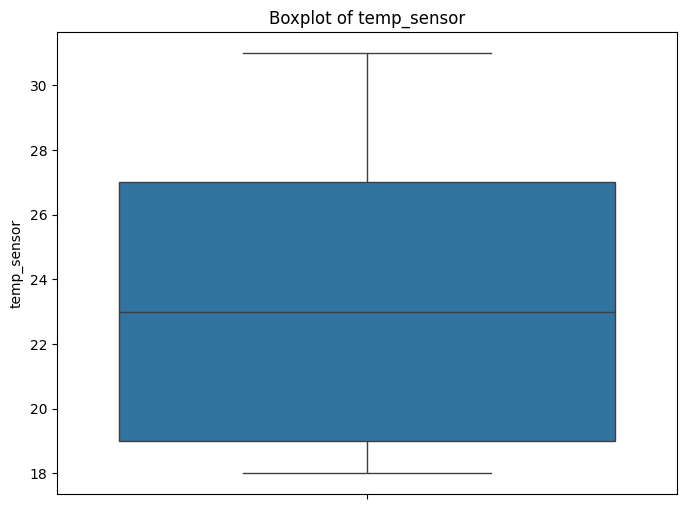

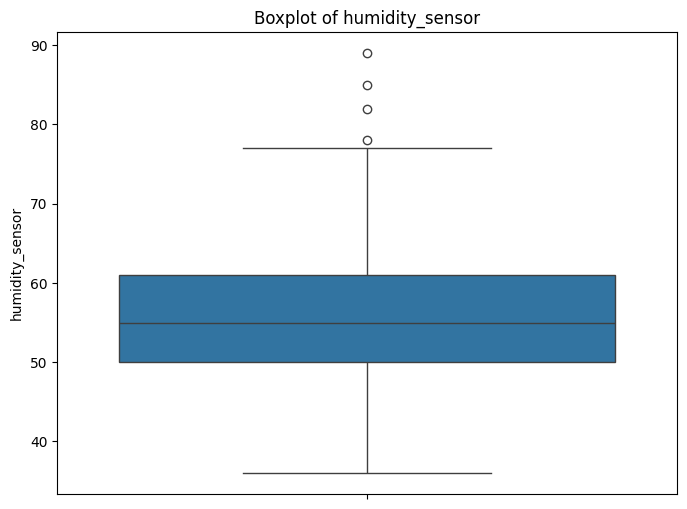

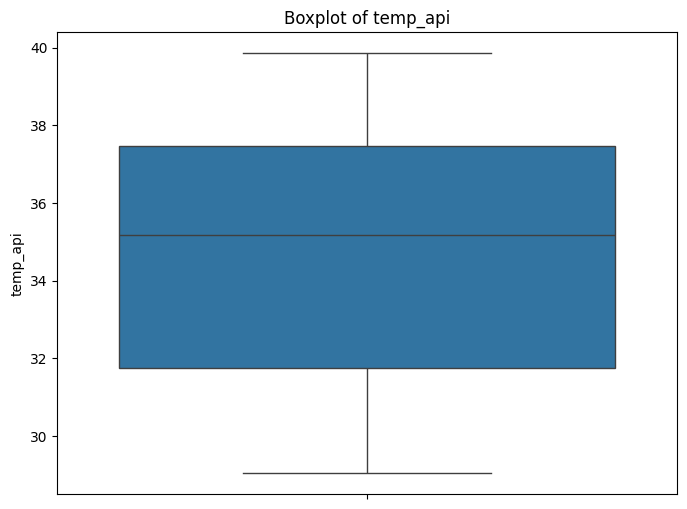

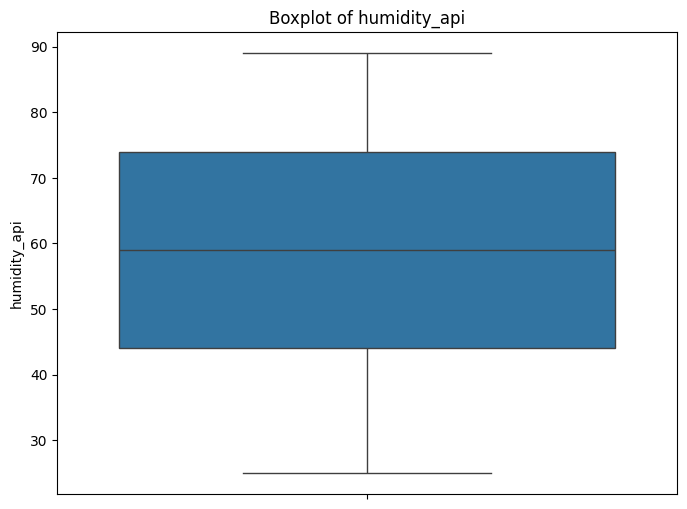

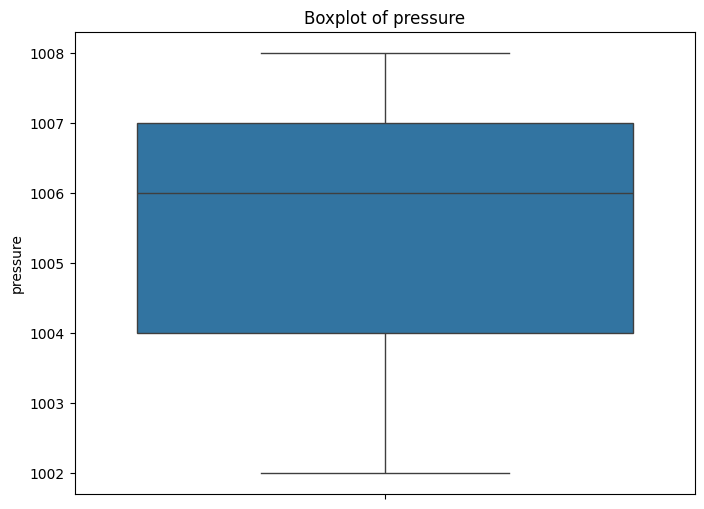

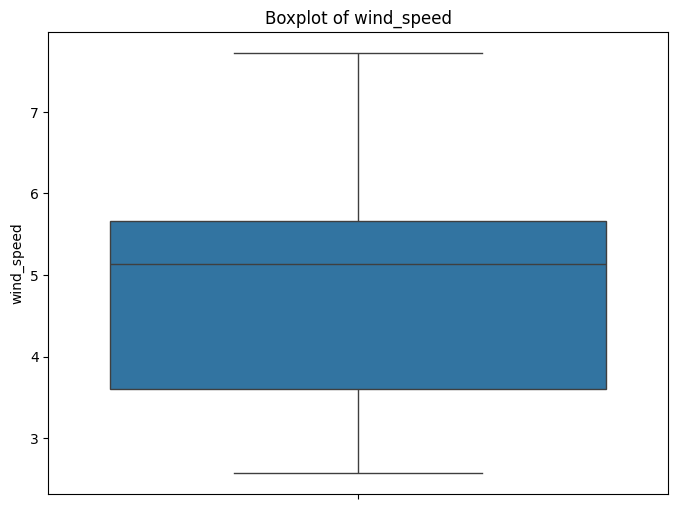

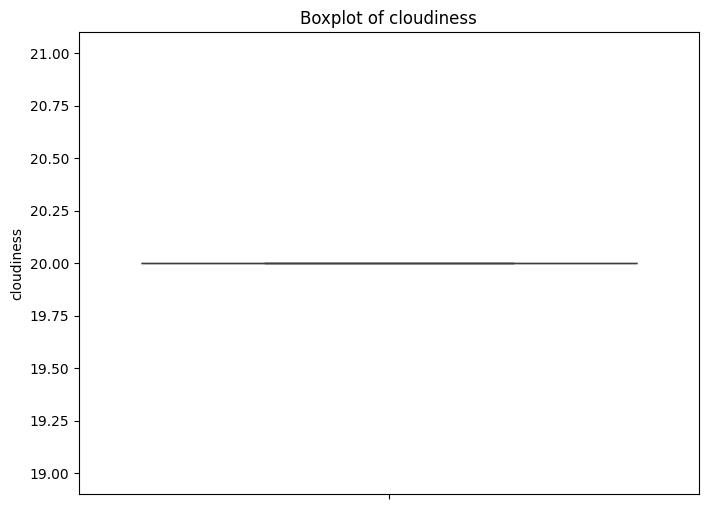

In [537]:
# Visualizing numerical features using boxplot
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data, y=feature)
    plt.title(f'Boxplot of {feature}')
    plt.ylabel(feature)
    plt.show()

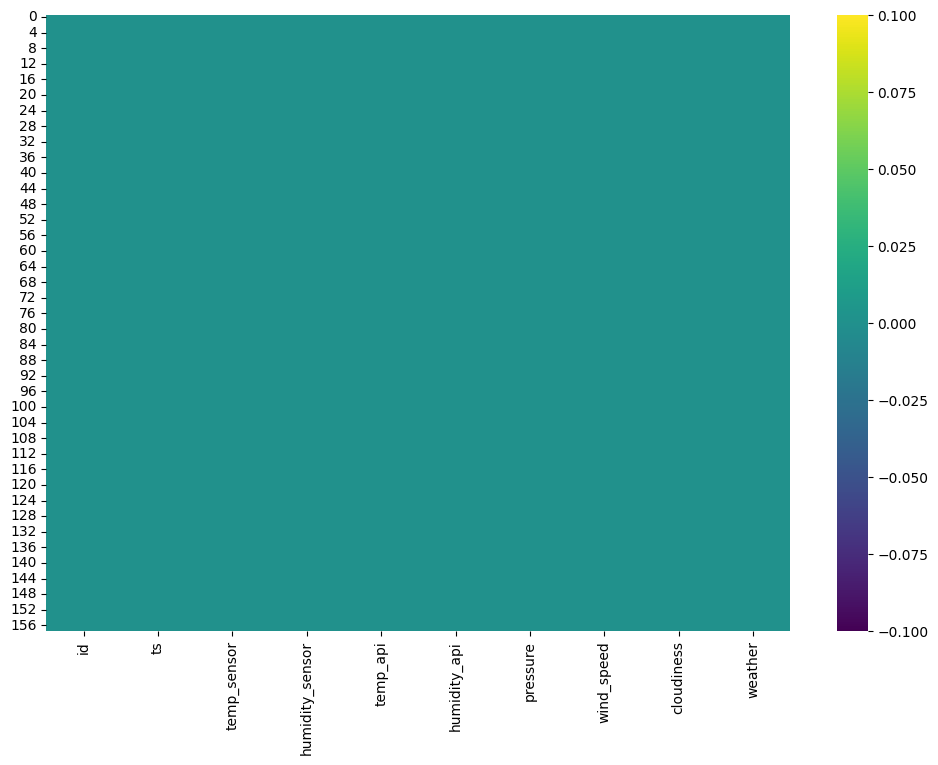

In [538]:
plt.figure(figsize=(12,8))
sns.heatmap(data=data.isnull(), cmap="viridis")
plt.show()

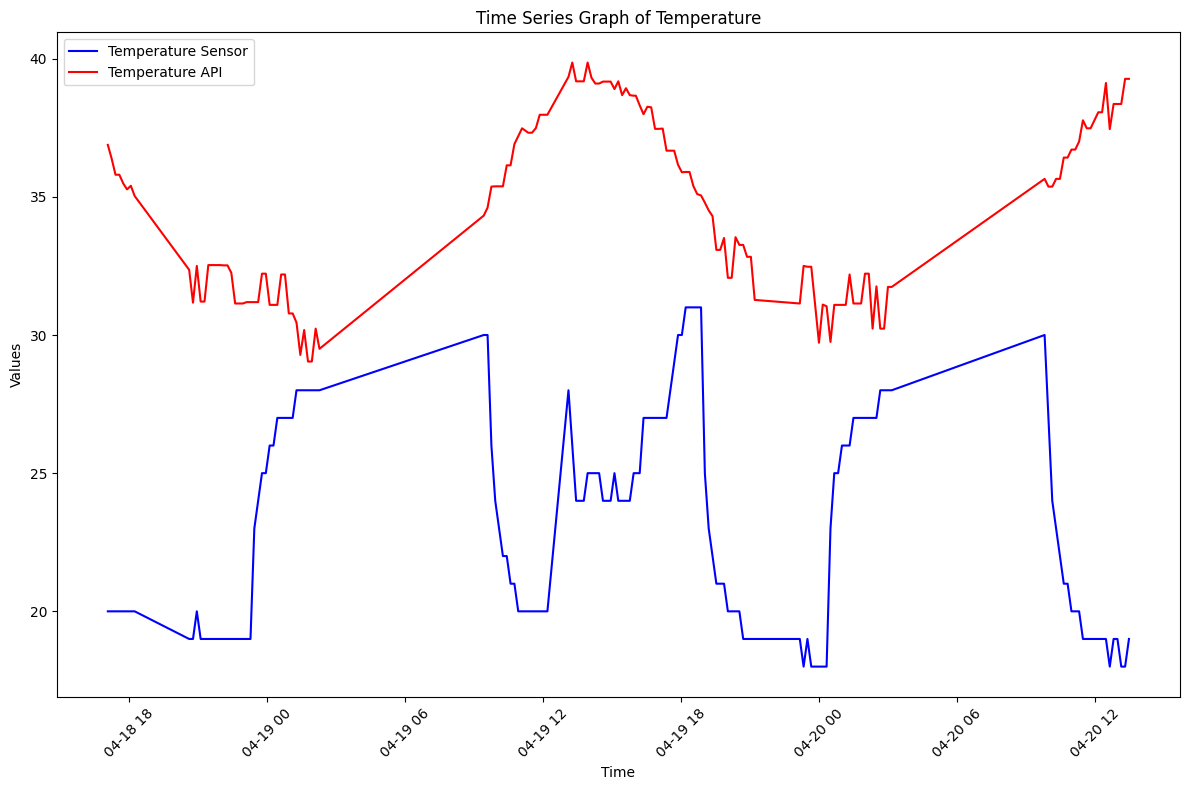

In [539]:
plt.figure(figsize=(12, 8))
plt.plot(data['ts'], data['temp_sensor'], label='Temperature Sensor', color='blue')
plt.plot(data['ts'], data['temp_api'], label='Temperature API', color='red')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Time Series Graph of Temperature')
plt.legend()

plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

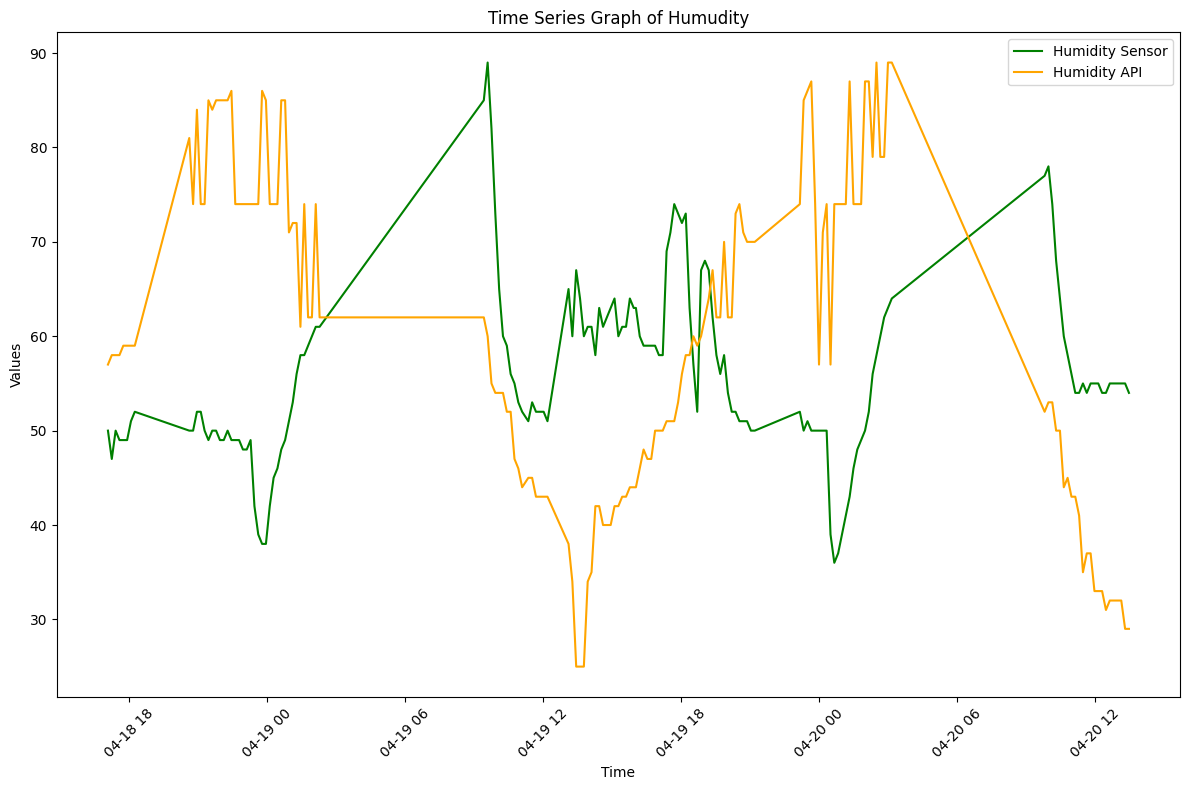

In [540]:
plt.figure(figsize=(12, 8))
plt.plot(data['ts'], data['humidity_sensor'], label='Humidity Sensor', color='green')
plt.plot(data['ts'], data['humidity_api'], label='Humidity API', color='orange')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Time Series Graph of Humudity')
plt.legend()

plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

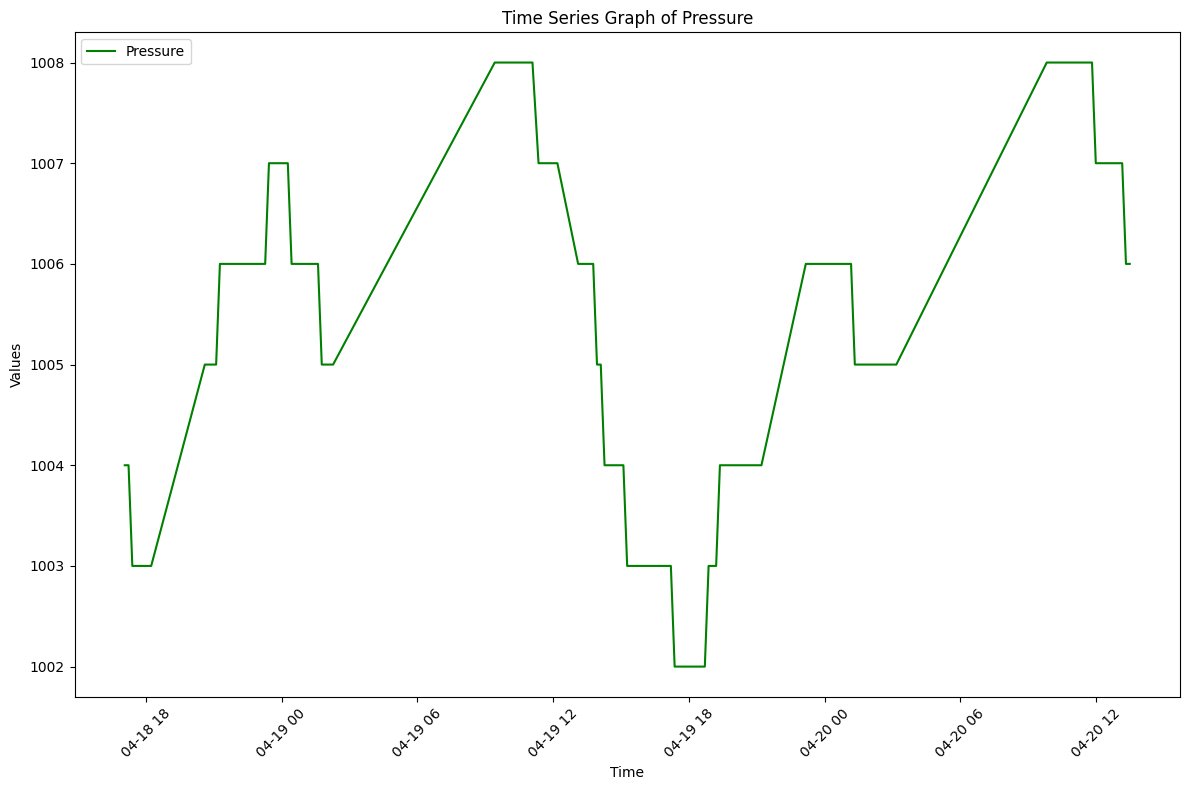

In [541]:
plt.figure(figsize=(12, 8))
plt.plot(data['ts'], data['pressure'], label='Pressure', color='green')

plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Time Series Graph of Pressure')
plt.legend()

plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

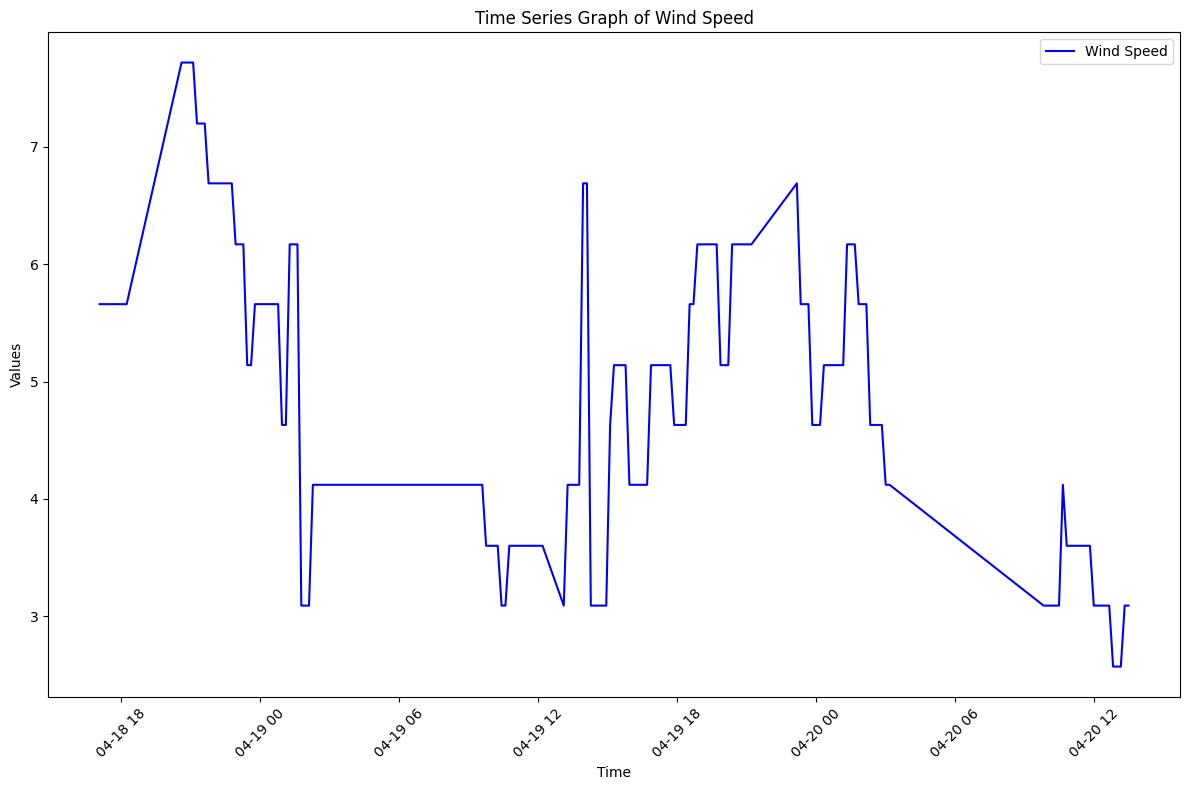

In [542]:
plt.figure(figsize=(12, 8))
plt.plot(data['ts'], data['wind_speed'], label='Wind Speed', color='Blue')

plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Time Series Graph of Wind Speed')
plt.legend()

plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

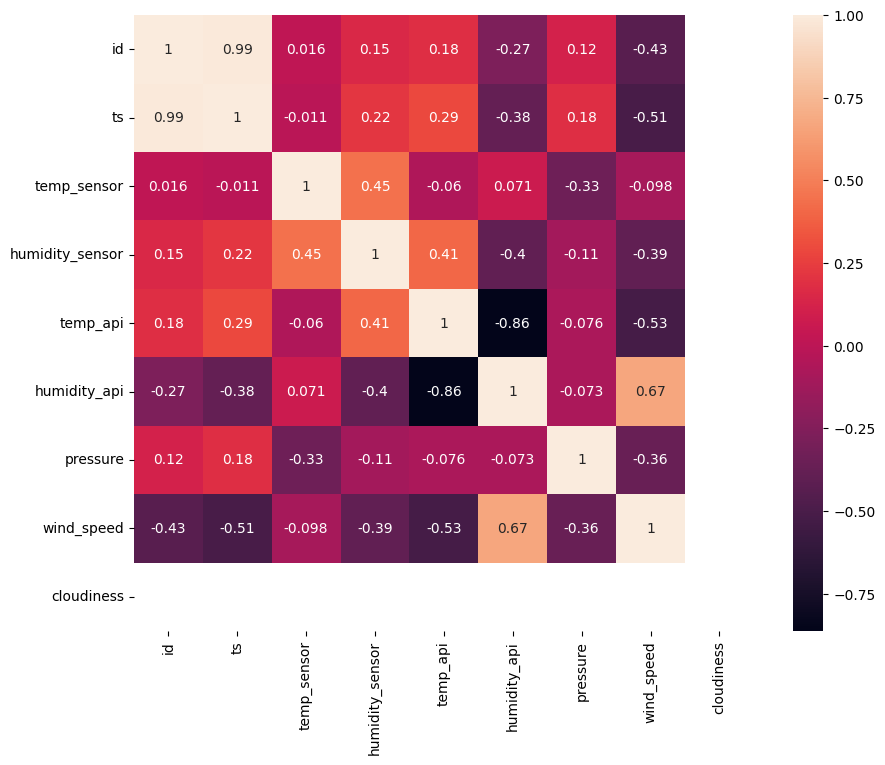

In [543]:
plt.figure(figsize=(10,8))
sns.heatmap(data=data.drop("weather", axis=1).corr(), annot=True,)
plt.show()

# Preprocessing

In [544]:
data.dtypes

id                          int64
ts                 datetime64[ns]
temp_sensor                 int64
humidity_sensor             int64
temp_api                  float64
humidity_api                int64
pressure                    int64
wind_speed                float64
cloudiness                  int64
weather                    object
dtype: object

In [545]:
display(data.head())

,id,ts,temp_sensor,humidity_sensor,temp_api,humidity_api,pressure,wind_speed,cloudiness,weather
0,1,2024-04-18 17:04:21,20,50,36.88,57,1004,5.66,20,Clouds
1,2,2024-04-18 17:14:22,20,47,36.38,58,1004,5.66,20,Clouds
2,3,2024-04-18 17:24:22,20,50,35.80,58,1003,5.66,20,Clouds
3,4,2024-04-18 17:34:22,20,49,35.80,58,1003,5.66,20,Clouds
4,5,2024-04-18 17:44:23,20,49,35.49,59,1003,5.66,20,Clouds


In [546]:
data["day_of_week"] = data["ts"].dt.dayofweek
data["month"] = data["ts"].dt.month
data["hour"] = data["ts"].dt.hour

data.drop("ts", axis=1, inplace=True)
display(data.head())

,id,temp_sensor,humidity_sensor,temp_api,humidity_api,pressure,wind_speed,cloudiness,weather,day_of_week,month,hour
0,1,20,50,36.88,57,1004,5.66,20,Clouds,3,4,17
1,2,20,47,36.38,58,1004,5.66,20,Clouds,3,4,17
2,3,20,50,35.80,58,1003,5.66,20,Clouds,3,4,17
3,4,20,49,35.80,58,1003,5.66,20,Clouds,3,4,17
4,5,20,49,35.49,59,1003,5.66,20,Clouds,3,4,17


# Modeling

In [547]:
X = data.drop(["weather"], axis=1)
y = data["weather"]

In [548]:
display(X)
display(y)

,id,temp_sensor,humidity_sensor,temp_api,humidity_api,pressure,wind_speed,cloudiness,day_of_week,month,hour
0,1,20,50,36.88,57,1004,5.66,20,3,4,17
1,2,20,47,36.38,58,1004,5.66,20,3,4,17
2,3,20,50,35.80,58,1003,5.66,20,3,4,17
3,4,20,49,35.80,58,1003,5.66,20,3,4,17
4,5,20,49,35.49,59,1003,5.66,20,3,4,17
...,...,...,...,...,...,...,...,...,...,...,...
153,154,19,55,38.36,32,1007,2.57,20,5,4,12
154,155,19,55,38.36,32,1007,2.57,20,5,4,12
155,156,18,55,38.36,32,1007,2.57,20,5,4,13
156,157,18,55,39.27,29,1006,3.09,20,5,4,13


0      Clouds
1      Clouds
2      Clouds
3      Clouds
4      Clouds
        ...  
153    Clouds
154    Clouds
155    Clouds
156    Clouds
157    Clouds
Name: weather, Length: 158, dtype: object

In [549]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [550]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
display(y_train_encoded)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1])

In [551]:
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)

In [552]:
display(X_train)
display(y_train_encoded)

array([[0.85987261, 0.92307692, 0.77358491, ..., 1.        , 0.        ,
        0.39130435],
       [0.28025478, 0.92307692, 1.        , ..., 0.5       , 0.        ,
        0.39130435],
       [0.8089172 , 0.69230769, 0.26415094, ..., 1.        , 0.        ,
        0.08695652],
       ...,
       [0.45859873, 0.53846154, 0.52830189, ..., 0.5       , 0.        ,
        0.65217391],
       [0.89171975, 0.23076923, 0.45283019, ..., 1.        , 0.        ,
        0.43478261],
       [0.23566879, 0.76923077, 0.41509434, ..., 0.5       , 0.        ,
        0.04347826]])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1])

In [553]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=1)
rf_classifier.fit(X_train, y_train_encoded)

RandomForestClassifier(random_state=1)

In [554]:
predictions_encoded = rf_classifier.predict(X_test)
predictions = label_encoder.inverse_transform(predictions_encoded)
display(predictions)

C:\Users\mazon\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array(['Clouds', 'Clouds', 'Clouds', 'Clouds', 'Clouds', 'Clouds',
       'Clouds', 'Clouds', 'Clouds', 'Clouds', 'Clouds', 'Clouds',
       'Clouds', 'Clouds', 'Clouds', 'Clouds', 'Clouds', 'Clouds',
       'Clouds', 'Clouds', 'Clouds', 'Clouds', 'Clouds', 'Clouds',
       'Clouds', 'Clouds', 'Clouds', 'Clouds', 'Clouds', 'Clouds',
       'Clouds', 'Clouds'], dtype=object)

# Evaluate The model

In [555]:

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
print("-----------------------------------------------------------")
class_report = classification_report(y_test, predictions)
print("Classification Report:\n", class_report)
print("-----------------------------------------------------------")
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.875
-----------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

      Clouds       0.88      1.00      0.93        28
        Rain       0.00      0.00      0.00         4

    accuracy                           0.88        32
   macro avg       0.44      0.50      0.47        32
weighted avg       0.77      0.88      0.82        32

-----------------------------------------------------------
Confusion Matrix:
 [[28  0]
 [ 4  0]]


C:\Users\mazon\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mazon\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mazon\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

# Export Model

In [556]:
# joblib.dump(rf_classifier, 'random_foresting_model.pkl')
# joblib.dump(label_encoder, 'label_encoder_model.pkl')
# joblib.dump(min_max_scaler, 'min_max_scaler_model.pkl')